## Cleaning data

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
plt.rcParams["font.family"] = "Arial"

c:\Users\Ian\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
nov_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202311.csv")
nov_data

,visibility,datetime,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,...,sys.sunset,weather.id,weather.main,weather.description,weather.icon,extraction_date_time,city_name,sys.type,sys.id,rain.1h
0,10000.0,2023-11-06 15:35:43+08:00,119.9811,16.1561,30.52,36.34,30.52,30.52,1009.0,70.0,...,2023-11-06 17:28:29+08:00,804.0,Clouds,overcast clouds,04d,2023-11-06 15:45:05.122654+08:00,Alaminos,NaN,NaN,NaN
1,10000.0,2023-11-06 15:45:07+08:00,120.5833,15.1500,35.25,42.25,35.25,35.25,1010.0,55.0,...,2023-11-06 17:27:17+08:00,802.0,Clouds,scattered clouds,03d,2023-11-06 15:45:07.511028+08:00,Angeles City,1.0,8152.0,NaN
2,10000.0,2023-11-06 15:45:09+08:00,121.1900,15.6181,29.74,34.87,29.74,29.74,1010.0,72.0,...,2023-11-06 17:24:18+08:00,801.0,Clouds,few clouds,02d,2023-11-06 15:45:09.096131+08:00,Antipolo,NaN,NaN,NaN
3,10000.0,2023-11-06 15:45:11+08:00,123.5085,12.2285,29.01,34.34,29.01,29.01,1009.0,78.0,...,2023-11-06 17:19:03+08:00,803.0,Clouds,broken clouds,04d,2023-11-06 15:45:11.662533+08:00,Bacolod,NaN,NaN,NaN
4,10000.0,2023-11-06 15:45:12+08:00,120.9290,14.4590,32.05,39.05,30.58,33.99,1009.0,72.0,...,2023-11-06 17:26:44+08:00,801.0,Clouds,few clouds,02d,2023-11-06 15:45:12.970057+08:00,Bacoor,2.0,2005706.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,10000.0,2023-11-24 00:04:56+08:00,124.5725,11.1089,25.08,26.05,25.08,25.08,1009.0,92.0,...,2023-11-24 17:15:13+08:00,800.0,Clear,clear sky,01n,2023-11-24 00:04:56.733308+08:00,Valencia,NaN,NaN,NaN
14467,10000.0,2023-11-24 00:04:59+08:00,120.9667,14.7000,27.11,30.72,26.13,27.28,1011.0,87.0,...,2023-11-24 17:24:04+08:00,804.0,Clouds,overcast clouds,04n,2023-11-24 00:04:59.184542+08:00,Valenzuela,2.0,2008256.0,NaN
14468,10000.0,2023-11-24 00:05:00+08:00,123.0778,10.9000,26.65,26.65,26.65,26.65,1009.0,89.0,...,2023-11-24 17:21:31+08:00,801.0,Clouds,few clouds,02n,2023-11-24 00:05:00.763382+08:00,Victorias,NaN,NaN,NaN
14469,10000.0,2023-11-24 00:05:03+08:00,120.3869,17.5747,25.50,26.30,25.50,25.50,1011.0,84.0,...,2023-11-24 17:21:46+08:00,802.0,Clouds,scattered clouds,03n,2023-11-24 00:05:03.247071+08:00,Vigan,NaN,NaN,NaN


Let's remove the columns with categorical variables:

- sys.sunrise
- sys.sunset
- weather.id
- weather.main
- weather.description
- weather.icon
- extraction_date_time
- sys.type
- sys.id

We can use the function

<center>

```pandas.DataFrame.drop(columns=['name1', 'name2', ...])```

</center>

In [3]:
nov_data = nov_data.drop(columns=['sys.sunrise', 'sys.sunset', 'weather.id', 'weather.main', 'weather.icon', 'weather.description', \
                                  'extraction_date_time', 'sys.type', 'sys.id'])

In [4]:
nov_data

,visibility,datetime,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,city_name,rain.1h
0,10000.0,2023-11-06 15:35:43+08:00,119.9811,16.1561,30.52,36.34,30.52,30.52,1009.0,70.0,1009.0,1007.0,1.82,66.0,2.63,93.0,Alaminos,NaN
1,10000.0,2023-11-06 15:45:07+08:00,120.5833,15.1500,35.25,42.25,35.25,35.25,1010.0,55.0,NaN,NaN,3.09,90.0,NaN,40.0,Angeles City,NaN
2,10000.0,2023-11-06 15:45:09+08:00,121.1900,15.6181,29.74,34.87,29.74,29.74,1010.0,72.0,1010.0,1001.0,2.89,89.0,5.47,14.0,Antipolo,NaN
3,10000.0,2023-11-06 15:45:11+08:00,123.5085,12.2285,29.01,34.34,29.01,29.01,1009.0,78.0,1009.0,1008.0,5.41,66.0,7.71,66.0,Bacolod,NaN
4,10000.0,2023-11-06 15:45:12+08:00,120.9290,14.4590,32.05,39.05,30.58,33.99,1009.0,72.0,NaN,NaN,2.57,100.0,NaN,20.0,Bacoor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,10000.0,2023-11-24 00:04:56+08:00,124.5725,11.1089,25.08,26.05,25.08,25.08,1009.0,92.0,1009.0,1005.0,1.65,65.0,2.55,6.0,Valencia,NaN
14467,10000.0,2023-11-24 00:04:59+08:00,120.9667,14.7000,27.11,30.72,26.13,27.28,1011.0,87.0,NaN,NaN,2.21,36.0,3.52,99.0,Valenzuela,NaN
14468,10000.0,2023-11-24 00:05:00+08:00,123.0778,10.9000,26.65,26.65,26.65,26.65,1009.0,89.0,1009.0,1007.0,3.08,27.0,4.74,18.0,Victorias,NaN
14469,10000.0,2023-11-24 00:05:03+08:00,120.3869,17.5747,25.50,26.30,25.50,25.50,1011.0,84.0,1011.0,1009.0,2.98,43.0,3.13,45.0,Vigan,NaN


And we can see that the aforementioned columns have been removed. We then remove the NaNs on our dataframe and replace it with 0 by the function:

<center>

```pandas.DataFrame.fillna(0)```

</center>

In [5]:
nov_data = nov_data.fillna(0)
nov_data

,visibility,datetime,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,city_name,rain.1h
0,10000.0,2023-11-06 15:35:43+08:00,119.9811,16.1561,30.52,36.34,30.52,30.52,1009.0,70.0,1009.0,1007.0,1.82,66.0,2.63,93.0,Alaminos,0.00
1,10000.0,2023-11-06 15:45:07+08:00,120.5833,15.1500,35.25,42.25,35.25,35.25,1010.0,55.0,0.0,0.0,3.09,90.0,0.00,40.0,Angeles City,0.00
2,10000.0,2023-11-06 15:45:09+08:00,121.1900,15.6181,29.74,34.87,29.74,29.74,1010.0,72.0,1010.0,1001.0,2.89,89.0,5.47,14.0,Antipolo,0.00
3,10000.0,2023-11-06 15:45:11+08:00,123.5085,12.2285,29.01,34.34,29.01,29.01,1009.0,78.0,1009.0,1008.0,5.41,66.0,7.71,66.0,Bacolod,0.00
4,10000.0,2023-11-06 15:45:12+08:00,120.9290,14.4590,32.05,39.05,30.58,33.99,1009.0,72.0,0.0,0.0,2.57,100.0,0.00,20.0,Bacoor,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,10000.0,2023-11-24 00:04:56+08:00,124.5725,11.1089,25.08,26.05,25.08,25.08,1009.0,92.0,1009.0,1005.0,1.65,65.0,2.55,6.0,Valencia,0.00
14467,10000.0,2023-11-24 00:04:59+08:00,120.9667,14.7000,27.11,30.72,26.13,27.28,1011.0,87.0,0.0,0.0,2.21,36.0,3.52,99.0,Valenzuela,0.00
14468,10000.0,2023-11-24 00:05:00+08:00,123.0778,10.9000,26.65,26.65,26.65,26.65,1009.0,89.0,1009.0,1007.0,3.08,27.0,4.74,18.0,Victorias,0.00
14469,10000.0,2023-11-24 00:05:03+08:00,120.3869,17.5747,25.50,26.30,25.50,25.50,1011.0,84.0,1011.0,1009.0,2.98,43.0,3.13,45.0,Vigan,0.00


Now, let's try to solve for the mean of each variable for each city. We can do that using the function 

<center>

```pandas.DataFrame.groupby(['var'], as_index=False)['col']```

</center>

```var``` is the variable that we want our dataframe to be grouped by and ```col``` is the column that we are grouping. In the example above, we want to group by the city names on the ```rain.1h``` column and take its mean! 

In [6]:
nov_data.groupby(['city_name'])['rain.1h'].mean()

city_name
Alaminos          0.006250
Angeles City      0.012788
Antipolo          0.004904
Bacolod           1.065825
Bacoor            0.014660
                    ...   
Valencia          0.727143
Valenzuela        0.086571
Victorias         0.584000
Vigan             0.000000
Zamboanga City    0.246952
Name: rain.1h, Length: 138, dtype: float64

Let's see if the mean of the Alaminos series gives 0.006250:

In [7]:
np.mean(nov_data[nov_data.city_name=='Alaminos'].iloc[:, -1])

0.00625

Now, we can take multiple variables and columns, we just have to make sure that they are done as a list. 

<center>

```pandas.DataFrame.groupby([['var1', 'var2', 'var3', ...]], as_index=False)[['col1', 'col2', 'col3', ...]]```

</center>

Now let's do the same thing as before but do it to all the relevant columns.

In [8]:
nov_clean = nov_data.groupby(['city_name'], as_index=False)[['visibility', 'main.temp', 'main.feels_like', 'main.temp_min', 'main.temp_max', 'main.pressure', \
                                'main.humidity', 'main.sea_level', 'main.grnd_level', 'wind.speed', 'wind.deg', 'wind.gust', \
                                'clouds.all', 'rain.1h']].mean()
nov_clean

,city_name,visibility,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,rain.1h
0,Alaminos,10000.000000,27.160385,28.933365,27.160385,27.160385,1012.105769,73.000000,1012.105769,1010.009615,3.344231,89.076923,4.101923,63.519231,0.006250
1,Angeles City,9788.461538,28.131731,30.668173,28.131731,28.131731,1013.076923,71.182692,19.509615,19.278846,2.400962,235.721154,0.012692,48.451923,0.012788
2,Antipolo,10000.000000,25.569808,26.822692,25.569808,25.569808,1012.923077,77.009615,1012.923077,1003.442308,2.486827,74.336538,3.927212,67.788462,0.004904
3,Bacolod,9384.533981,26.549903,28.609515,26.549903,26.549903,1010.815534,86.699029,1010.815534,1009.805825,4.201359,41.699029,7.705243,76.300971,1.065825
4,Bacoor,9970.873786,28.316505,31.731359,27.466408,29.236990,1011.893204,77.203883,98.252427,98.194175,2.401359,89.145631,0.517864,44.873786,0.014660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Valencia,9794.819048,26.126857,27.871714,26.126857,26.126857,1010.571429,87.438095,1010.571429,1006.628571,1.599524,78.066667,3.531524,74.647619,0.727143
134,Valenzuela,10000.000000,28.548476,32.135143,27.427905,29.097905,1013.180952,75.180952,9.638095,9.628571,2.295333,70.171429,5.727238,78.876190,0.086571
135,Victorias,9452.047619,27.025810,29.304381,27.025810,27.025810,1010.657143,84.428571,1010.657143,1008.980952,5.214286,47.323810,7.110571,76.742857,0.584000
136,Vigan,10000.000000,26.872667,29.581143,26.872667,26.872667,1012.790476,78.133333,713.561905,712.304762,3.056571,125.123810,3.695810,53.247619,0.000000


In [9]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Normalize the DataFrame
norm_nov = normalize(nov_clean.iloc[:, 1:]) # make sure to use .iloc[:, 1:]

# Initialize PCA
n_comp = 3
pca = PCA(n_components=n_comp)

# Fit the data using the PCA class
pca.fit(norm_nov)

# Transform the data to 3 PCA vectors
pca_nov = pca.transform(norm_nov)

In [10]:
pca_nov.shape

(138, 3)

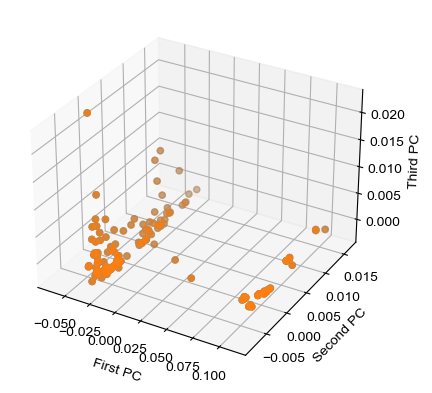

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for m, zlow, zhigh in [('o', -50, -25), ('o', -30, -5)]:
    xs = pca_nov[:, 0]
    ys = pca_nov[:, 1]
    zs = pca_nov[:, 2]
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')

plt.show()

In [23]:
pca_novdf = pd.DataFrame(pca_nov)
pca_novdf['city_name'] = nov_clean['city_name']
pca_novdf.columns = ['PCA_1', 'PCA_2', 'PCA_3', 'city_name']
pca_novdf

,PCA_1,PCA_2,PCA_3,city_name
0,-0.029859,-0.001861,-0.002532,Alaminos
1,0.108678,0.011365,0.001847,Angeles City
2,-0.029497,-0.003297,-0.002364,Antipolo
3,-0.038950,-0.006115,0.004112,Bacolod
4,0.097473,-0.003536,-0.000327,Bacoor
...,...,...,...,...
133,-0.032467,-0.002727,-0.000290,Valencia
134,0.109862,-0.005623,0.000238,Valenzuela
135,-0.037816,-0.005581,0.003329,Victorias
136,0.011473,0.001144,-0.002068,Vigan


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [29]:
scaler = StandardScaler()

pca_novdf[['PCA1_T', 'PCA2_T', 'PCA3_T']] = scaler.fit_transform(pca_novdf[['PCA_1', 'PCA_2', 'PCA_3']])
pca_novdf

,PCA_1,PCA_2,PCA_3,city_name,PCA1_T,PCA2_T,PCA3_T
0,-0.029859,-0.001861,-0.002532,Alaminos,-0.506992,-0.313311,-0.821146
1,0.108678,0.011365,0.001847,Angeles City,1.845294,1.912991,0.598786
2,-0.029497,-0.003297,-0.002364,Antipolo,-0.500835,-0.554937,-0.766636
3,-0.038950,-0.006115,0.004112,Bacolod,-0.661346,-1.029315,1.333333
4,0.097473,-0.003536,-0.000327,Bacoor,1.655027,-0.595210,-0.106029
...,...,...,...,...,...,...,...
133,-0.032467,-0.002727,-0.000290,Valencia,-0.551274,-0.459074,-0.094069
134,0.109862,-0.005623,0.000238,Valenzuela,1.865399,-0.946465,0.077037
135,-0.037816,-0.005581,0.003329,Victorias,-0.642092,-0.939415,1.079335
136,0.011473,0.001144,-0.002068,Vigan,0.194807,0.192578,-0.670525


In [30]:
def optimize_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)


    # Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show

    return None

In [34]:
optimize_means(pca_novdf[['PCA1_T', 'PCA2_T', 'PCA3_T']], 10)

AttributeError: 'NoneType' object has no attribute 'split'